In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/Supplementary data 1.xlsx')

In [ ]:
df.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [ ]:
df.tail()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
344,410,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.0,...,NaN,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5
345,411,2,12.14,37,46.1,49.0,9.0,20.0,0.00,0.0,...,NaN,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5
346,412,2.83,19.23,59,45.8,83.0,9.0,16.0,0.02,0.6,...,NaN,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5
347,413,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.3,...,NaN,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7
348,414,1.61,13.00,39,44.9,68.0,7.0,13.0,0.01,0.2,...,NaN,0.23,11.0,1.10,224,4.13,12.1,8.3,68.6,184.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    object 
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    object 
 13  CA19-9      325 non-null    object 
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [ ]:
# Three columns with a datatype error that we fix and turn into numbers
for i,j in enumerate(df['AFP']):
  try:
    if type(j)==str:
      n_j=re.sub(r'\\t','',j)
      n_j=float(n_j)
      df['AFP'][i]=n_j
  except:
    n_j=np.nan
    df['AFP'][i]=n_j
df['AFP']=df['AFP'].astype(float)


df['AFP'][1]=3.42

for i,j in enumerate(df['CA19-9']):
  try:
    if type(j)==str:
      n_j=re.sub(r'\\t','',j)
      n_j=float(n_j)
      df['CA19-9'][i]=n_j
  except:
    n_j=np.nan
    df['CA19-9'][i]=n_j
df['CA19-9']=df['CA19-9'].astype(float)

for i,j in enumerate(df['CA125']):
  try:
    if type(j)==str:
      n_j=re.sub(r'\\t','',j)
      n_j=float(n_j)
      df['CA125'][i]=n_j
  except:
    n_j=np.nan
    df['CA125'][i]=n_j
df['CA125']=df['CA125'].astype(float)

In [ ]:
corr = df.corr()
corr['TYPE'].sort_values()

,TYPE
Age,-0.514098
Menopause,-0.455770
NEU,-0.437075
CA125,-0.412501
HE4,-0.385290
CA72-4,-0.328764
PLT,-0.270182
PCT,-0.243649
AST,-0.217904
ALP,-0.215681


In [ ]:
cdf = df[['LYM#','LYM%','ALB','ALP','AST','PCT','PLT',
          'HE4','CA125','Menopause','Age','TYPE']]

cdf.describe()

,LYM#,LYM%,ALB,ALP,AST,PCT,PLT,HE4,CA125,Menopause,Age,TYPE
count,349.000000,349.000000,339.000000,339.000000,339.000000,347.000000,349.000000,329.000000,330.000000,349.000000,349.000000,349.000000
mean,1.557593,26.070831,41.076991,77.085546,19.106195,0.251458,255.432665,183.948967,322.203182,0.340974,45.051576,0.510029
std,0.561449,10.386006,5.686780,44.375700,8.495069,0.085308,95.241974,380.372693,711.358646,0.474717,15.130949,0.500617
min,0.350000,3.900000,22.000000,26.000000,7.000000,0.070000,74.000000,16.710000,3.750000,0.000000,15.000000,0.000000
25%,1.190000,18.400000,38.300000,60.000000,13.500000,0.192000,202.000000,42.200000,18.900000,0.000000,33.000000,0.000000
50%,1.500000,26.600000,42.000000,71.000000,17.000000,0.240000,236.000000,53.270000,43.955000,0.000000,45.000000,1.000000
75%,1.870000,32.800000,45.300000,87.000000,22.000000,0.300000,292.000000,130.600000,241.750000,1.000000,57.000000,1.000000
max,3.490000,51.600000,51.500000,763.000000,78.000000,0.690000,868.000000,3537.600000,4468.000000,1.000000,83.000000,1.000000


In [ ]:
for i in cdf.columns:
    cdf[i].fillna(cdf[i].mean(), inplace=True)

<Axes: ylabel='count'>

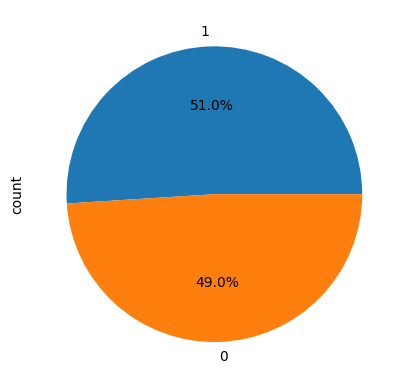

In [ ]:
df['TYPE'].value_counts().plot(kind='pie',autopct='%1.1f%%')

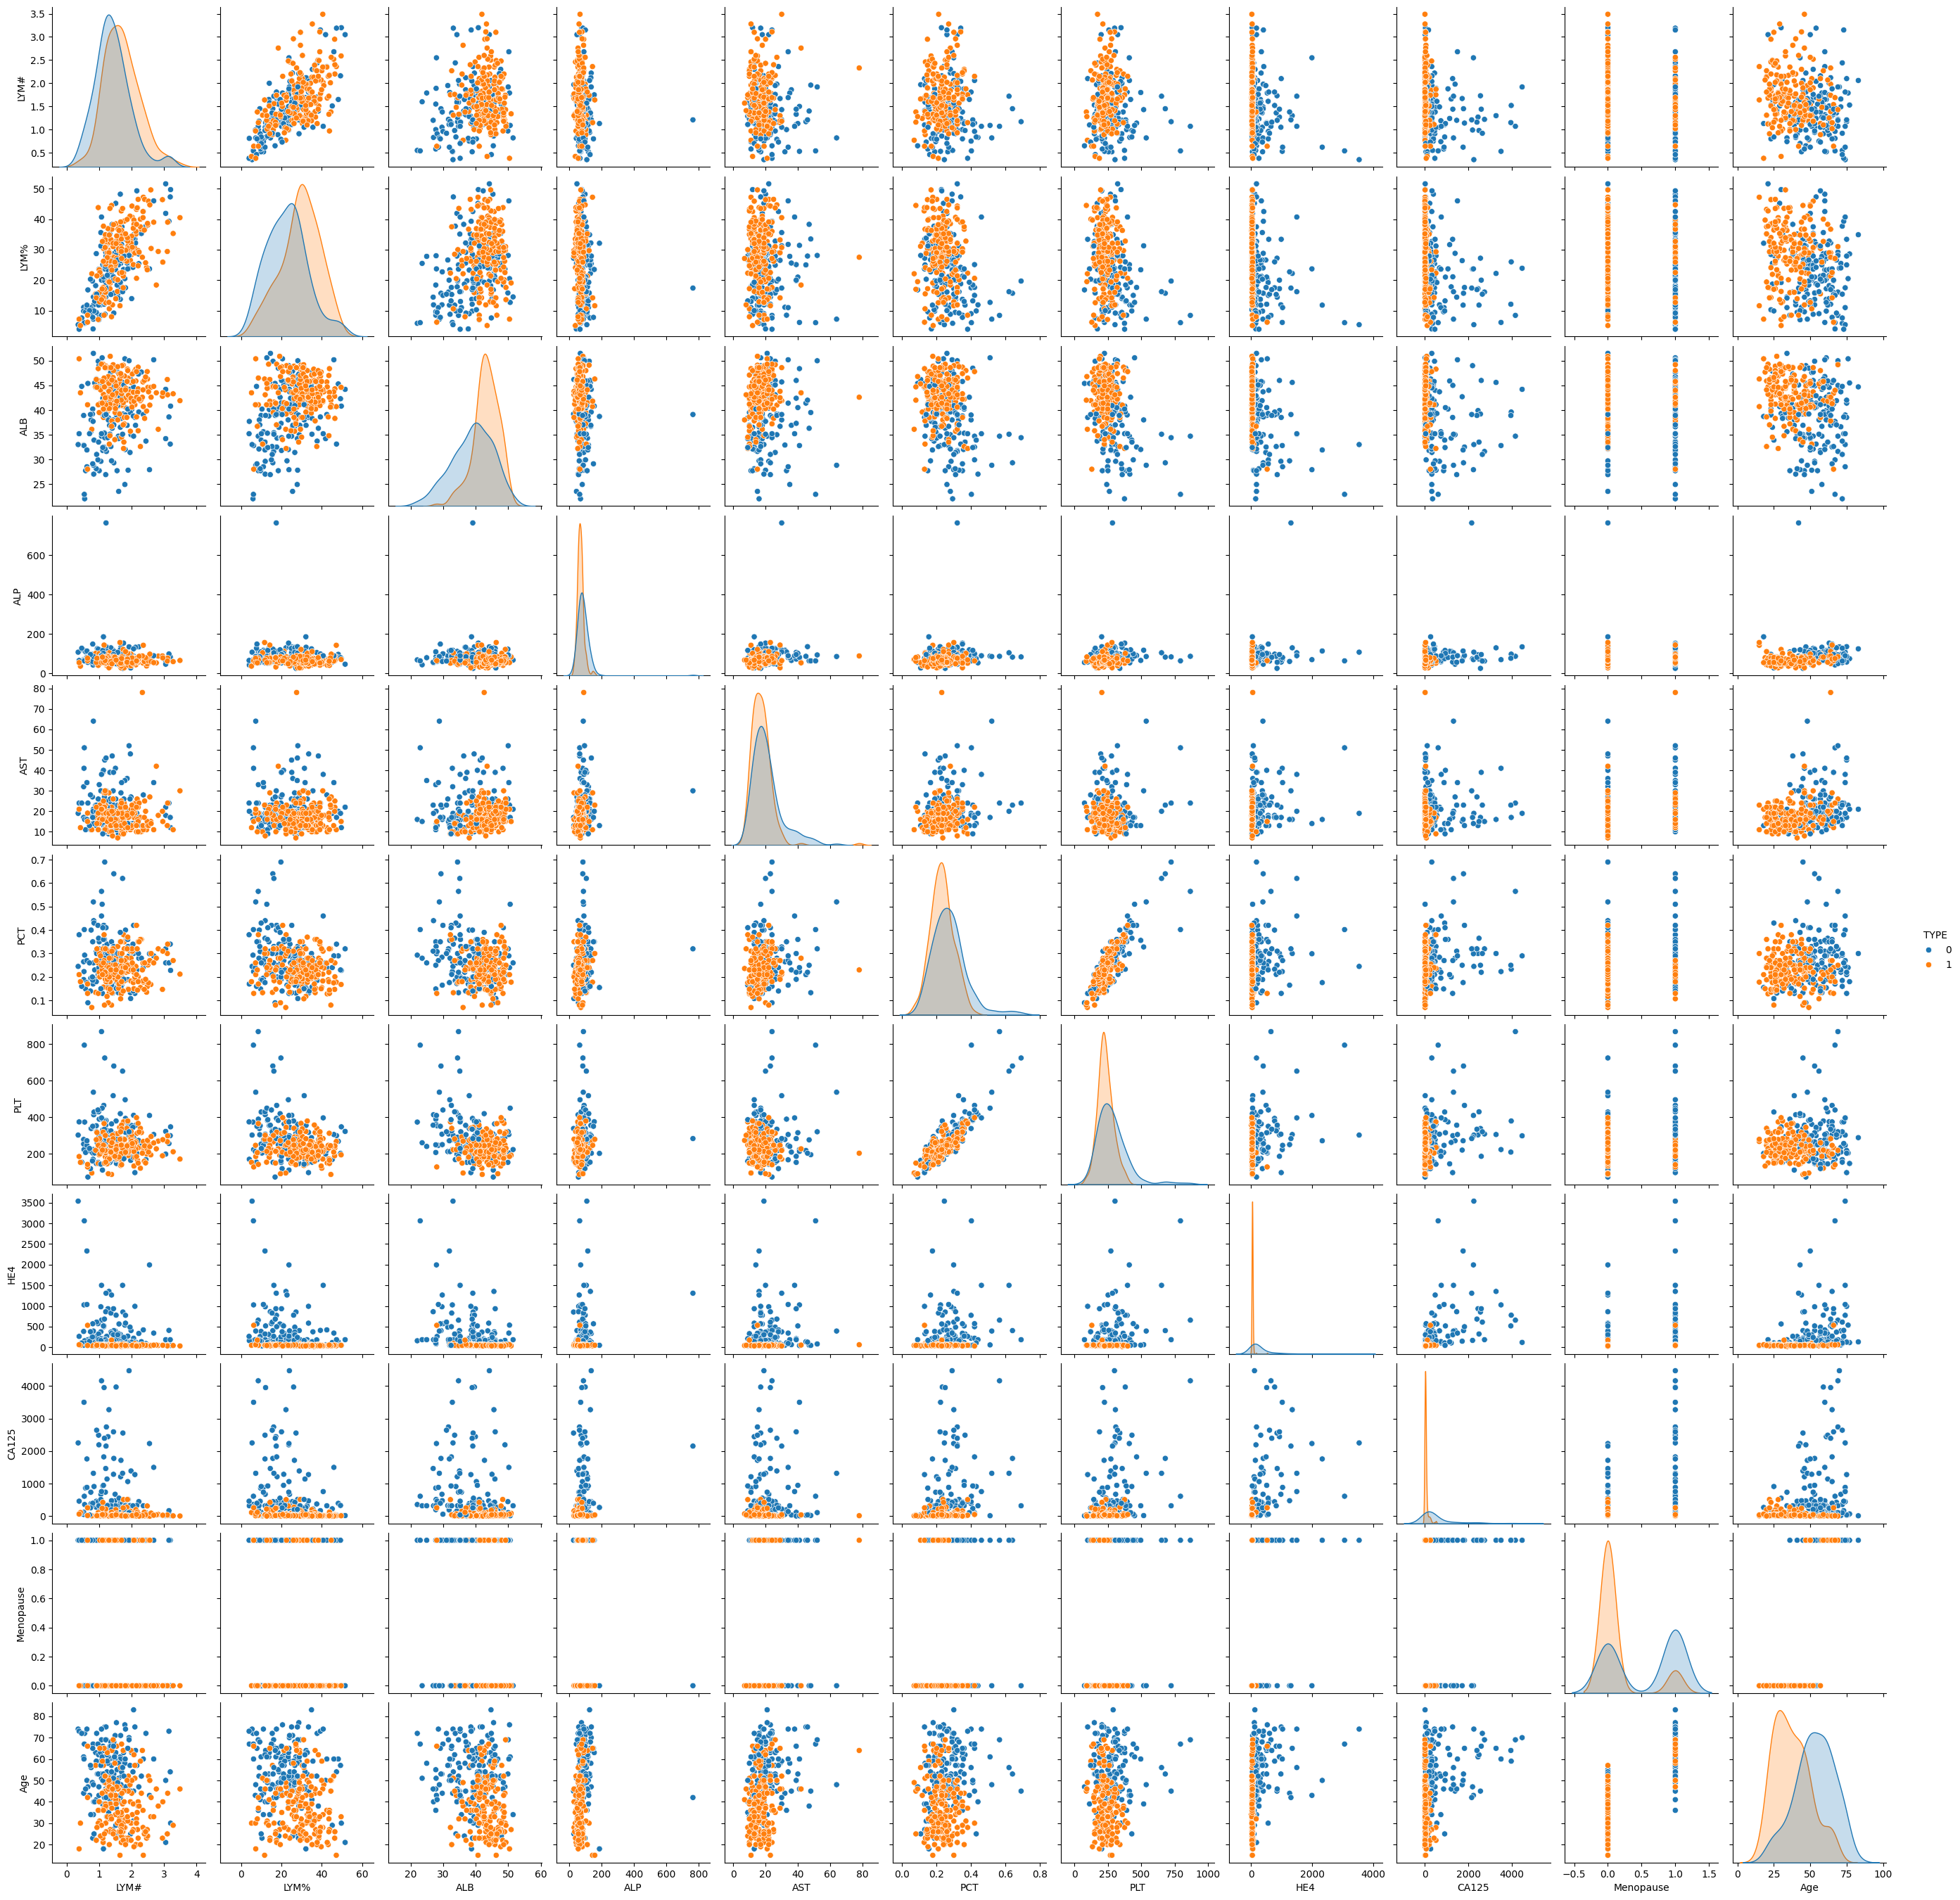

In [ ]:
sns.pairplot(cdf,hue='TYPE')

<Axes: >

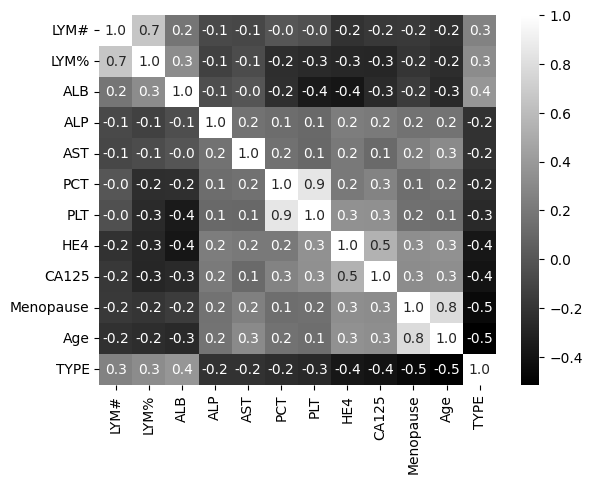

In [ ]:
corr=cdf.corr()
sns.heatmap(corr,annot=True,cmap='gray',fmt='.1f')

In [ ]:
X = cdf.drop(columns='TYPE')
y = cdf['TYPE']

model = LogisticRegression()

selector = SequentialFeatureSelector(model, scoring='f1', n_jobs=-1)

selector.fit(X, y)

selected_features = selector.get_feature_names_out(X.columns)

print(selected_features)

['PLT' 'HE4' 'CA125' 'Menopause' 'Age']


In [ ]:
X = cdf[['PLT', 'HE4', 'CA125', 'Menopause', 'Age','ALB']]
y = cdf['TYPE']

In [ ]:
from  sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.84      0.96      0.90        45

    accuracy                           0.89        88
   macro avg       0.89      0.88      0.89        88
weighted avg       0.89      0.89      0.89        88

Train ACC :0.9003831417624522
F1 : 0.8958333333333334
ACC cross val 5 : 0.8772859216255444


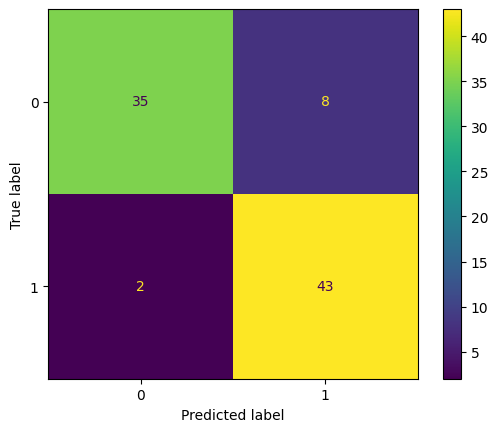

In [ ]:
log = LogisticRegression(C= 10, penalty= None, solver= 'lbfgs')

log.fit(x_train,y_train)

pred = log.predict(x_test)
tacc = log.score(x_train,y_train)

cross = cross_val_score(log,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.86      0.96      0.91        45

    accuracy                           0.90        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.90      0.90      0.90        88

Train ACC :0.9118773946360154
F1 : 0.9052631578947369
ACC cross val 5 : 0.8579825834542817


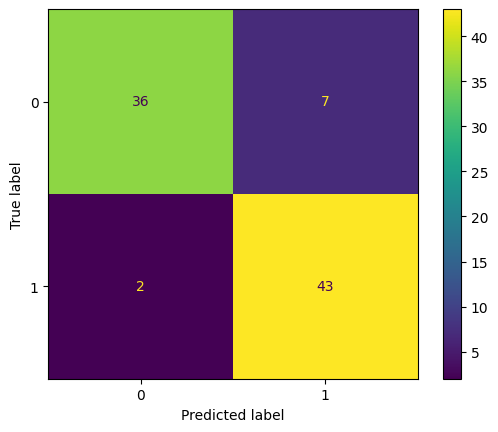

In [ ]:
svc = SVC(C= 10, decision_function_shape= 'ovo', degree= 4, kernel= 'poly',gamma=5)

svc.fit(x_train,y_train)

pred = svc.predict(x_test)
tacc=svc.score(x_train,y_train)

cross = cross_val_score(svc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        43
           1       0.83      1.00      0.91        45

    accuracy                           0.90        88
   macro avg       0.92      0.90      0.90        88
weighted avg       0.91      0.90      0.90        88

Train ACC :0.9042145593869731
F1 : 0.9090909090909091
ACC cross val 5 : 0.8809869375907112


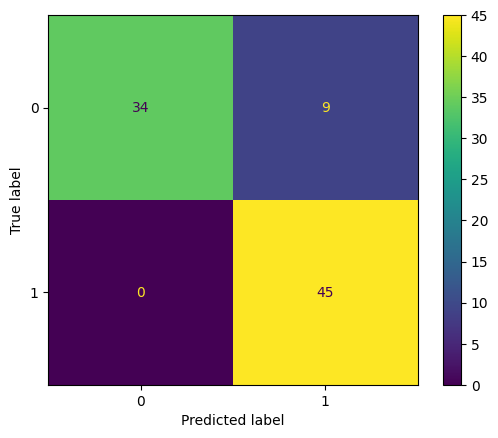

In [ ]:
nsvc = NuSVC(decision_function_shape= 'ovo', degree= 4, kernel= 'poly', nu= 0.3)

nsvc.fit(x_train,y_train)

pred = nsvc.predict(x_test)
tacc=nsvc.score(x_train,y_train)

cross = cross_val_score(nsvc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.85      0.91      0.88        45

    accuracy                           0.88        88
   macro avg       0.88      0.87      0.87        88
weighted avg       0.88      0.88      0.87        88

Train ACC :0.9348659003831418
F1 : 0.8817204301075269
ACC cross val 5 : 0.8389695210449928


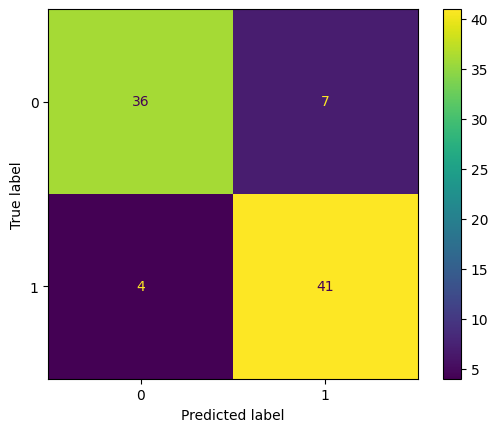

In [ ]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 6,max_features='sqrt'
                              ,splitter= 'best',random_state=42)

dtc.fit(x_train,y_train)

pred = dtc.predict(x_test)
tacc=dtc.score(x_train,y_train)

cross = cross_val_score(dtc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        43
           1       0.83      0.98      0.90        45

    accuracy                           0.89        88
   macro avg       0.90      0.88      0.88        88
weighted avg       0.90      0.89      0.89        88

Train ACC :0.9272030651340997
F1 : 0.8979591836734694
ACC cross val 5 : 0.8886066763425253


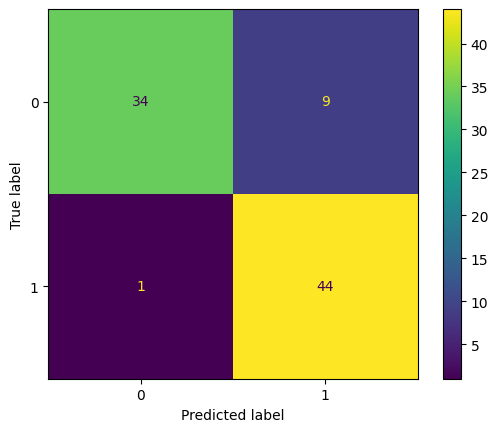

In [ ]:
rfc =RandomForestClassifier(random_state=42,bootstrap= False, criterion= 'entropy',
                            max_depth= 5, max_features= 'sqrt', n_estimators= 100)

rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)
tacc=rfc.score(x_train,y_train)

cross = cross_val_score(rfc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.86      0.84      0.85        45

    accuracy                           0.85        88
   macro avg       0.85      0.85      0.85        88
weighted avg       0.85      0.85      0.85        88

Train ACC :1.0
F1 : 0.8539325842696629
ACC cross val 5 : 0.861756168359942


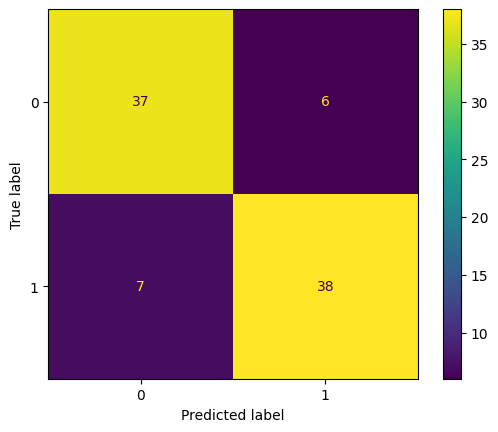

In [ ]:
abc =AdaBoostClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth= 6,
                                               max_features='sqrt', splitter= 'best',
                                               random_state=42),random_state=42,
                        algorithm= 'SAMME.R',
                        learning_rate= 0.1, n_estimators= 100)

abc.fit(x_train,y_train)

pred = abc.predict(x_test)
tacc=abc.score(x_train,y_train)

cross = cross_val_score(abc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.84      0.93      0.88        45

    accuracy                           0.88        88
   macro avg       0.88      0.87      0.87        88
weighted avg       0.88      0.88      0.87        88

Train ACC :0.9770114942528736
F1 : 0.8842105263157894
ACC cross val 5 : 0.8694484760522496


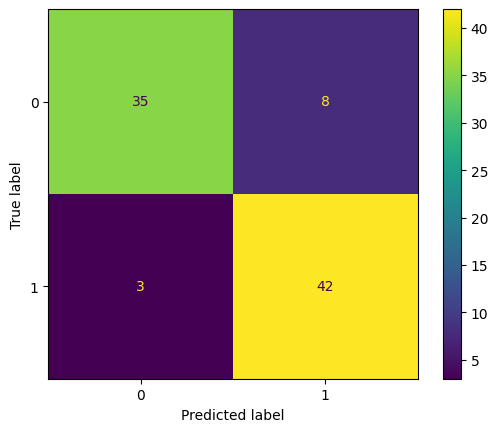

In [ ]:
gbc =GradientBoostingClassifier(criterion= 'squared_error', learning_rate= 0.001,
                                loss= 'exponential', max_depth= 8, max_features='sqrt',
                                n_estimators= 200)

gbc.fit(x_train,y_train)

pred = gbc.predict(x_test)
tacc=gbc.score(x_train,y_train)

cross = cross_val_score(gbc,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.84      0.96      0.90        45

    accuracy                           0.89        88
   macro avg       0.89      0.88      0.89        88
weighted avg       0.89      0.89      0.89        88

Train ACC :0.896551724137931
F1 : 0.8958333333333334
ACC cross val 5 : 0.8810595065312047


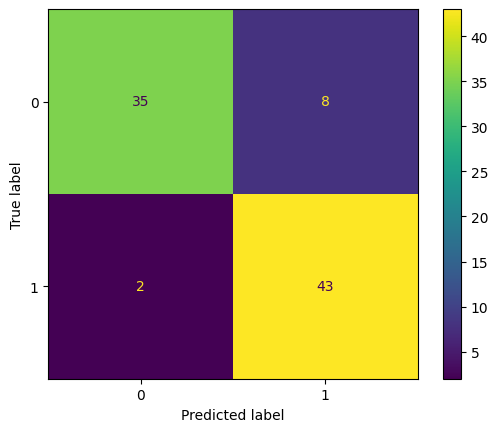

In [ ]:
xbg =XGBClassifier(booster= 'gblinear', learning_rate= 1, max_depth= 3, n_estimators= 100)

xbg.fit(x_train,y_train)

pred = xbg.predict(x_test)
tacc=xbg.score(x_train,y_train)

cross = cross_val_score(xbg,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.85      1.00      0.92        45

    accuracy                           0.91        88
   macro avg       0.92      0.91      0.91        88
weighted avg       0.92      0.91      0.91        88

Train ACC :0.9042145593869731
F1 : 0.9183673469387755
ACC cross val 5 : 0.8771407837445574


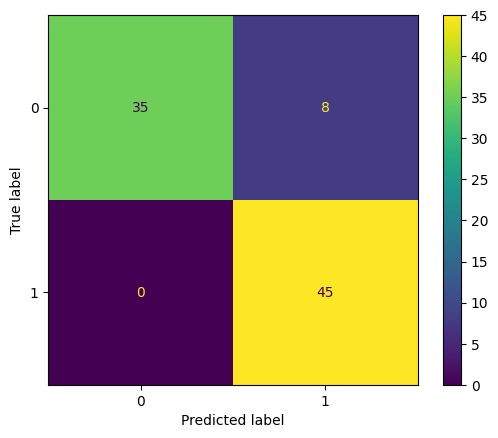

In [ ]:
vot = VotingClassifier([('lr',log),('svc',svc),('nsvc',nsvc)])
vot.fit(x_train,y_train)

pred = vot.predict(x_test)
tacc=vot.score(x_train,y_train)

cross = cross_val_score(vot,x_train,y_train,scoring='accuracy',cv=5)
cross = np.mean(cross)
print(classification_report(y_test,pred))
print('=============================================================')
print(f'Train ACC :{tacc}')
print('=============================================================')
print(f'F1 : {f1_score(y_test,pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Load your dataset from an Excel file
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Selecting features
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age']
X = data[features]

# Encoding categorical data if necessary
if data['Menopause'].dtype == 'object':
    le = LabelEncoder()
    X['Menopause'] = le.fit_transform(X['Menopause'])

# Target column
y = data['TYPE']  # Replace 'TYPE' with your actual target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'NuSVM': NuSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier())
    ], voting='soft')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, pred))

# Best model and accuracy
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]}")

# Graphical comparison
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Predicting TYPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '>5000.00'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Load your dataset from an Excel file
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Function to convert non-numeric strings to numbers
def convert_to_numeric(column):
    data[column] = pd.to_numeric(data[column].str.replace('>', '').str.replace('<', ''), errors='coerce')

# List columns that require cleaning (replace with actual feature columns needing cleaning)
columns_to_clean = ['PLT', 'HE4', 'CA125']  # Adjust the list according to your data specifics
for col in columns_to_clean:
    convert_to_numeric(col)

# Handling categorical data: Menopause
if data['Menopause'].dtype == 'object':
    le = LabelEncoder()
    data['Menopause'] = le.fit_transform(data['Menopause'])

# Selecting features
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age']
X = data[features]

# Target column
y = data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'NuSVM': NuSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier())
    ], voting='soft')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, pred))

# Best model and accuracy
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]}")

# Graphical comparison
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Predicting TYPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: Can only use .str accessor with string values!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Load your dataset from an Excel file
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Function to convert non-numeric strings to numbers, including explicit conversion to string
def convert_to_numeric(column):
    data[column] = pd.to_numeric(data[column].astype(str).str.replace('>', '').str.replace('<', ''), errors='coerce')

# List columns that require cleaning (replace with actual feature columns needing cleaning)
columns_to_clean = ['PLT', 'HE4', 'CA125']  # Adjust the list according to your data specifics
for col in columns_to_clean:
    convert_to_numeric(col)

# Handling categorical data: Menopause
if data['Menopause'].dtype == 'object':
    le = LabelEncoder()
    data['Menopause'] = le.fit_transform(data['Menopause'])

# Selecting features
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age']
X = data[features]

# Target column
y = data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'NuSVM': NuSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier())
    ], voting='soft')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, pred))

# Best model and accuracy
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]}")

# Graphical comparison
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Predicting TYPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Logistic Regression Accuracy: 0.8142857142857143
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.79      0.86      0.82        35

    accuracy                           0.81        70
   macro avg       0.82      0.81      0.81        70
weighted avg       0.82      0.81      0.81        70

SVM Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.76      0.89      0.82        35

    accuracy                           0.80        70
   macro avg       0.81      0.80      0.80        70
weighted avg       0.81      0.80      0.80        70

NuSVM Accuracy: 0.7571428571428571
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        35
           1       0.70      0.89      0.78        35

    accuracy                           0.76        70
   macro avg       0.78   

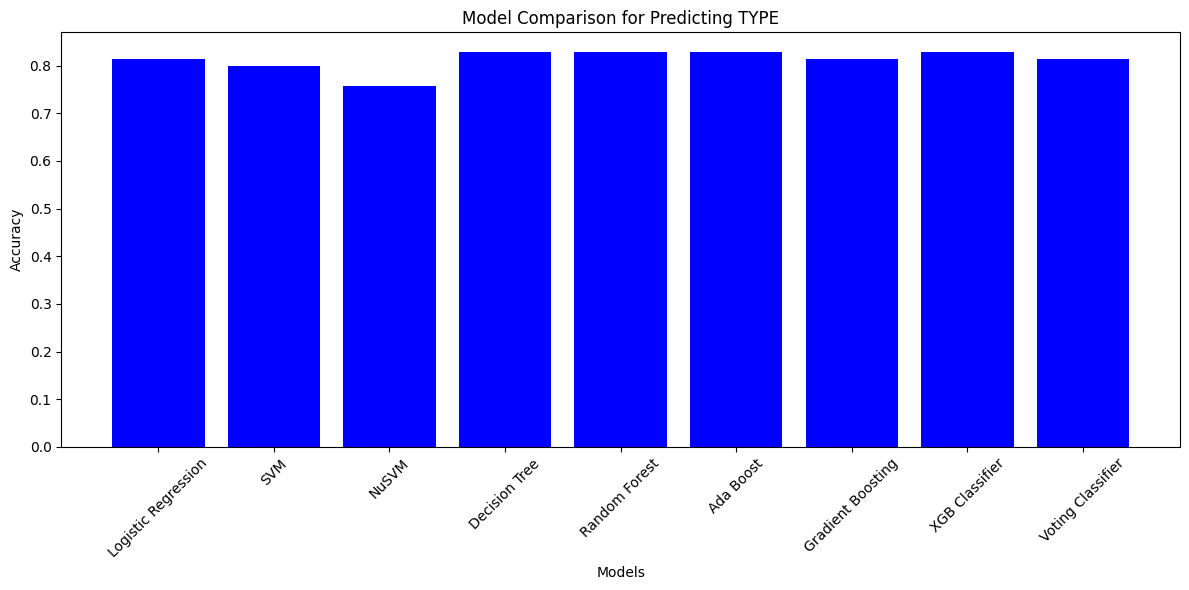

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Load your dataset from an Excel file
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Function to convert non-numeric strings to numbers, including explicit conversion to string
def convert_to_numeric(column):
    data[column] = pd.to_numeric(data[column].astype(str).str.replace('>', '').str.replace('<', ''), errors='coerce')

# List columns that require cleaning (replace with actual feature columns needing cleaning)
columns_to_clean = ['PLT', 'HE4', 'CA125']  # Adjust the list according to your data specifics
for col in columns_to_clean:
    convert_to_numeric(col)

# Handling categorical data: Menopause
if data['Menopause'].dtype == 'object':
    le = LabelEncoder()
    data['Menopause'] = le.fit_transform(data['Menopause'])

# Selecting features
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age']
X = data[features]

# Impute missing values in features
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Assuming all features except 'Menopause' are numeric
for feature in ['PLT', 'HE4', 'CA125', 'Age']:
    X[feature] = numeric_imputer.fit_transform(X[[feature]])

# Impute 'Menopause' if it's categorical
if 'Menopause' in X.columns:
    X['Menopause'] = categorical_imputer.fit_transform(X[['Menopause']])

# Target column
y = data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'NuSVM': NuSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier())
    ], voting='soft')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, pred))

# Best model and accuracy
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]}")

# Graphical comparison
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Predicting TYPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pip install tensorflow
pip install scikit-learn
pip install pandas
pip install matplotlib

SyntaxError: invalid syntax (<ipython-input-31-daec87805814>, line 1)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Assuming 'TYPE' is the target and other necessary preprocessing has been done
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age', 'ALB', 'LYM#', 'LYM%']
X = data[features]
y = data['TYPE']

# Fill missing values
X.fillna(X.mean(), inplace=True)

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# Build the model
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

# Predictions and report
y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: can only concatenate str (not "int") to str

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5796 - loss: 0.7825 - val_accuracy: 0.8302 - val_loss: 0.5842
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7403 - loss: 0.5920 - val_accuracy: 0.8302 - val_loss: 0.5540
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7172 - loss: 0.6266 - val_accuracy: 0.8491 - val_loss: 0.5325
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5276 - val_accuracy: 0.8491 - val_loss: 0.4992
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7742 - loss: 0.4531 - val_accuracy: 0.8302 - val_loss: 0.4818
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8465 - loss: 0.4141 - val_accuracy: 0.8302 - val_loss: 0.4770
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8295 - loss: 0.4179 - val_accuracy: 0.8679 - val_loss: 0.4579
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8109 - loss: 0.4611 - val_accuracy: 0.8302 - 

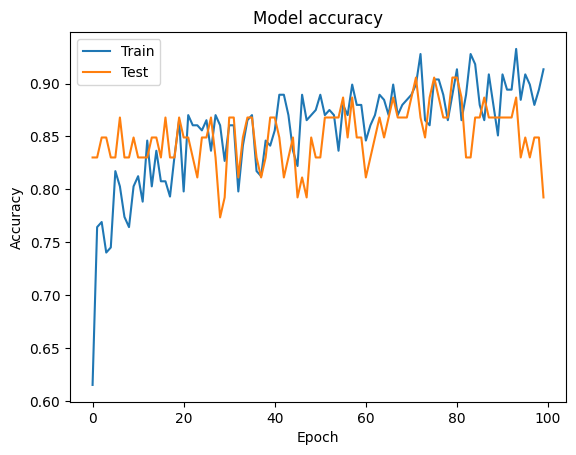

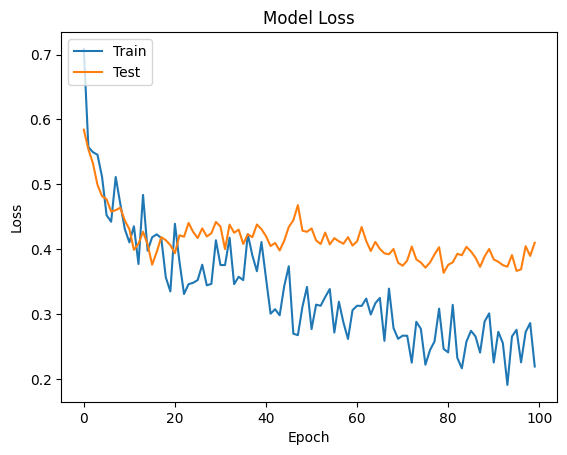

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Assuming 'TYPE' is the target and other necessary preprocessing has been done
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age', 'ALB', 'LYM#', 'LYM%']
X = data[features]
y = data['TYPE']

# Convert all feature columns to numeric, handling non-numeric entries
for feature in features:
    X[feature] = pd.to_numeric(X[feature], errors='coerce')

# Fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# Build the model
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

# Predictions and report
y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6256 - loss: 0.7160 - val_accuracy: 0.8113 - val_loss: 0.5725
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6977 - loss: 0.6611 - val_accuracy: 0.8679 - val_loss: 0.5350
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7440 - loss: 0.5460 - val_accuracy: 0.8491 - val_loss: 0.5154
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7389 - loss: 0.6226 - val_accuracy: 0.8302 - val_loss: 0.5338
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7853 - loss: 0.4650 - val_accuracy: 0.8113 - val_loss: 0.5120
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8359 - loss: 0.4426 - val_accuracy: 0.8679 - val_loss: 0.5087
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7321 - loss: 0.5446 - val_accuracy: 0.8868 - val_loss: 0.4925
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8072 - loss: 0.4163 - val_accuracy: 0.8679 -

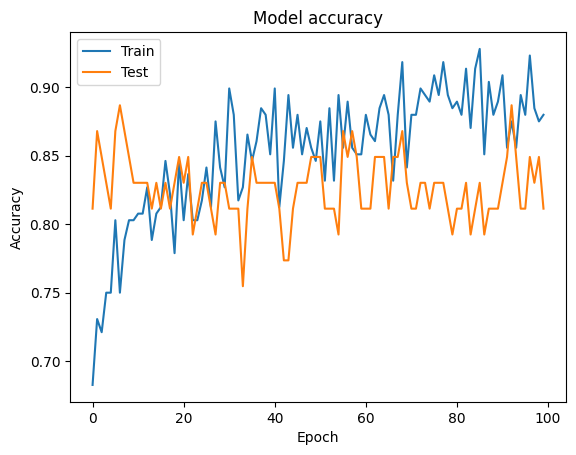

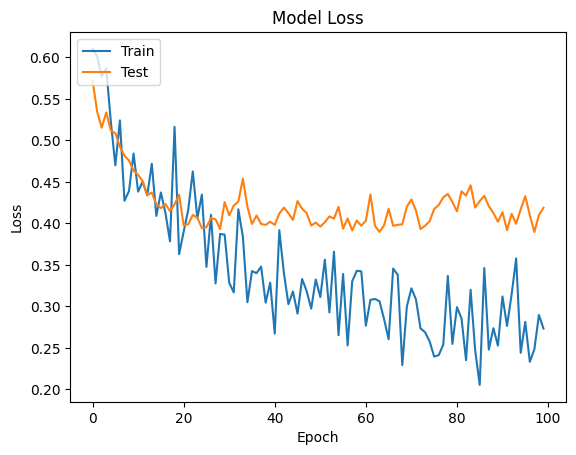

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel('/content/Supplementary data 1.xlsx')

# Assuming 'TYPE' is the target and other necessary preprocessing has been done
features = ['PLT', 'HE4', 'CA125', 'Menopause', 'Age', 'ALB', 'LYM#', 'LYM%']
X = data[features]
y = data['TYPE']

# Convert all feature columns to numeric, handling non-numeric entries
for feature in features:
    X[feature] = pd.to_numeric(X[feature], errors='coerce')

# Fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# Build the model
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

# Predictions and report
y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your feature matrix and labels respectively
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Now you can train your model on this balanced data
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
model.fit(x_train, y_train)  # Proceed as usual with model training

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8034 - loss: 0.4633
